<a href="https://colab.research.google.com/github/asweddrtt/Uni-Projects/blob/main/Camels_Vs_Horses_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

first, we want to install important libraries

In [1]:
!pip install --upgrade tensorflow
!pip install keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 3.7 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.12.0
    Uninstalling tensorboard-2.12.0:
      Successfully uninstalled tensorboard-2.12.0
  Attempting uninstall: keras
    Found e

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab import drive
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.python.keras import layers
from tensorflow.python.keras.models import Model
!pip install --upgrade tensorflow
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
import numpy as np
from IPython.display import Image
from tensorflow.keras.optimizers import Adam

data loading.. to connect your drive with google colab for reading your uploaded dataset easily(to mount your drive)

In [4]:
from google.colab import drive, files
drive.mount('/content/drive/')

Mounted at /content/drive/


Data augmentation (preprocessing step)

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2) # set validation split



Data Preparartion

In [6]:
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Project',
      #  target_size=target_size,
    color_mode='rgb',
    batch_size=64,
    class_mode='categorical',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Project', # same directory as training data
    # target_size=target_size,
    color_mode='rgb',
    batch_size=64,
    class_mode='categorical',
    subset='validation') # set as validation data

Found 320 images belonging to 2 classes.
Found 80 images belonging to 2 classes.


In [7]:
train_generator.image_shape

(256, 256, 3)

In [8]:
train_generator.class_indices

{'camel': 0, 'horse': 1}

Let's build our CNN model--> for more explanation details about CNN and improving your accuracy your can follow this site --> https://gsurma.medium.com/image-classifier-cats-vs-dogs-with-convolutional-neural-networks-cnns-and-google-colabs-4e9af21ae7a8

In [9]:
model = tf.keras.Sequential([
   tf.keras.layers.Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(256,256,3)),
   tf.keras.layers.MaxPool2D(
    pool_size=(2, 2)),
   tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
   tf.keras.layers.MaxPool2D(
    pool_size=(2, 2)),
   tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
   tf.keras.layers.MaxPool2D(
    pool_size=(2, 2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
     tf.keras.layers.Dense(2, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
#EPOCHS = 20
#INIT_LR = 1e-3
BS = 32


In [11]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01,
    decay_steps=10000,
    decay_rate=0.9)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
model.compile(loss="binary_crossentropy", optimizer=optimizer,metrics=["accuracy"])
#opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
# Adam optimizer
# loss function will be categorical cross entropy
# evaluation metric will be accuracy

In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       3,686,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,742,914 (14.28 MB)

 Trainable params: 3,742,914 (14.28 MB)

 Non-trainable params: 0 (0.00 B)

Training the model

In [13]:
history = model.fit(
        train_generator,
        steps_per_epoch=train_generator.samples//train_generator.batch_size,
        epochs=2,
        validation_data=validation_generator,
        validation_steps=validation_generator.samples//validation_generator.batch_size)




Epoch 1/2


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 98s 13s/step - accuracy: 0.5028 - loss: 43.1456 - val_accuracy: 0.5625 - val_loss: 0.6927
Epoch 2/2


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5625 - val_loss: 0.6938


for plotting your results

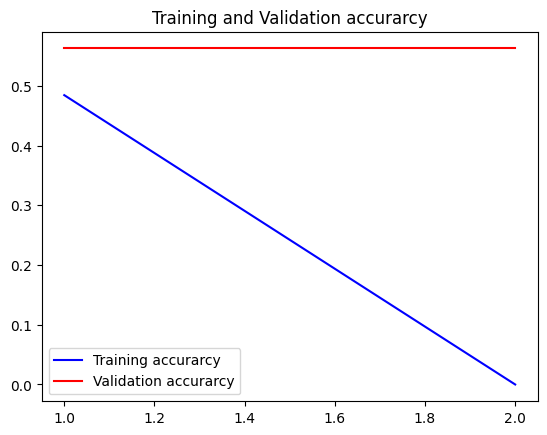

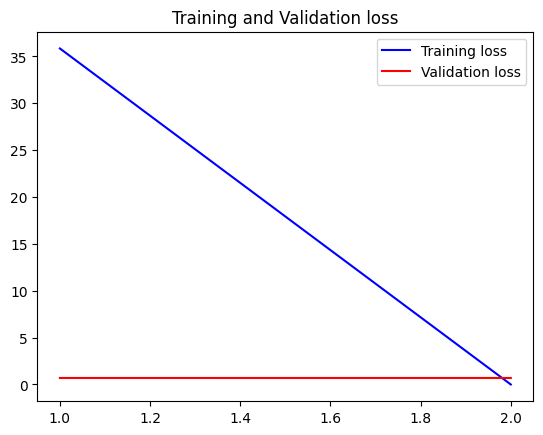

In [14]:
import matplotlib
import matplotlib.pyplot as plt


accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(accuracy) + 1)
#Train and validation accuracy
plt.plot(epochs, accuracy, 'b', label='Training accurarcy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [15]:
from keras.models import load_model
model.save('Catvsdogs1.h5')

In [17]:
# Get classes of model trained on
classes = train_generator.class_indices


In [16]:
Classes = ["Cats","Dogs"]

test your model

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
[1]


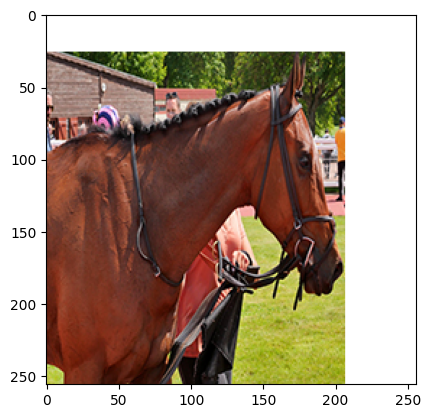

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Pre-Processing test data same as train data.
img_width=256
img_height=256


from keras.preprocessing import image

def prepare(img_path):
    img = image.load_img(img_path, target_size=(256, 256))
    x = image.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)
    # /content/drive/MyDrive/Kaggle/dataset/training_set/dogsdog.137.jpg
    # /content/drive/MyDrive/Kaggle/dataset/training_set/dogsdog.137.jpg

result = model.predict([prepare('/content/drive/MyDrive/Project/horse/1.png')])
result2=np.argmax(result,axis=1)
Animal=image.load_img('/content/drive/MyDrive/Project/horse/1.png')
plt.imshow(Animal)
print ([int(result2)])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
[0]


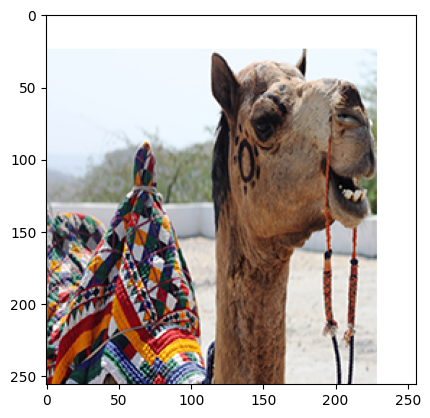

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Pre-Processing test data same as train data.
img_width=256
img_height=256


from keras.preprocessing import image

def prepare(img_path):
    img = image.load_img(img_path, target_size=(256, 256))
    x = image.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)
    # /content/drive/MyDrive/Kaggle/dataset/training_set/dogsdog.136.jpg
    # /content/drive/MyDrive/Kaggle/dataset/training_set/dogsdog.136.jpg

result = model.predict([prepare('/content/drive/MyDrive/Project/camel/0.png')])
result2=np.argmax(result,axis=1)
Animal=image.load_img('/content/drive/MyDrive/Project/camel/0.png')
plt.imshow(Animal)
print ([int(result2)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
[0]


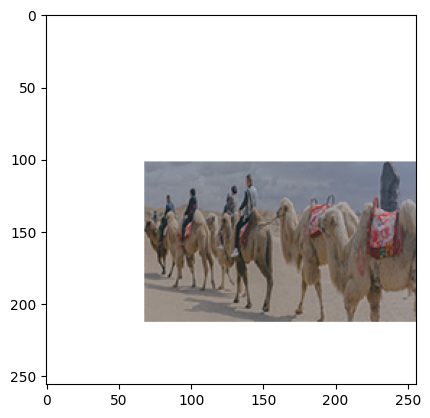

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Pre-Processing test data same as train data.
img_width=256
img_height=256


from keras.preprocessing import image

def prepare(img_path):
    img = image.load_img(img_path, target_size=(256, 256))
    x = image.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)


result = model.predict([prepare('/content/drive/MyDrive/Project/camel/10.png')])
result2=np.argmax(result,axis=1)
Animal=image.load_img('/content/drive/MyDrive/Project/camel/10.png')
plt.imshow(Animal)
print ([int(result2)])